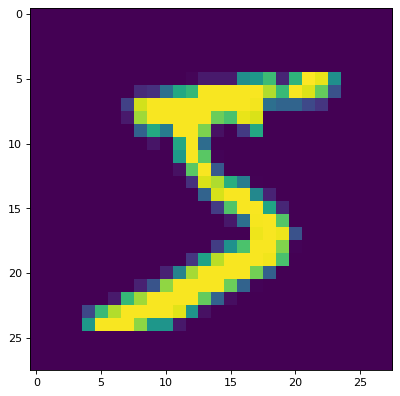

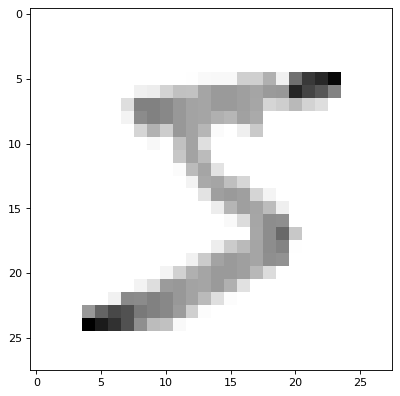

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 12, 12, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290  

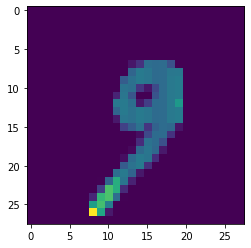

In [ ]:
# Program_20b.ipynb: CNN network for the MNIST data set.
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist # Digits 0-9, 28x28 pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
figure(figsize=(6, 6), dpi=80)
plt.imshow(x_train[0])
plt.show()
# Normalize the data.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
#x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
#x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
# Build the CNN (see Figure 20.1).
input_shape=(28,28,1)
inputs = tf.keras.layers.Input(shape=input_shape)    # The input layer.
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), activation=tf.nn.relu)(inputs)
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), activation=tf.nn.relu)(layer)
layer = tf.keras.layers.Flatten()(layer)
layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)   # The 1st hidden layer with RELU activation. 
layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)  # The 2nd hidden layer with RELU activation.
outputs = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(layer) # The number of classifications with softmax activation.
# Compile the CNN.
model = tf.keras.Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 3)
x = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
predictions = model.predict([x_test])
print(predictions)
import numpy as np
index = 1000
print(np.argmax(predictions[index]))
plt.imshow(x_test[index].reshape((28,28)))
plt.show()